In [1]:
%load_ext autoreload
%autoreload 2
import os
import cifar_utils
import seaborn as sns
%matplotlib notebook

ec2_host = "ec2-54-67-123-237.us-west-1.compute.amazonaws.com"
app_name = "superman_detection"
cifar_path = os.path.expanduser("~/model-serving/data/cifar")
test_x, test_y = cifar_utils.filter_data(
    *cifar_utils.load_cifar(cifar_path, cifar_filename="cifar_test.data", norm=True))

Number of image files: 10000


# Building an application:

```python
def superman_detection_client(uid, x):
    url = "http://clipper/superman_detection/predict"
    request_json = json.dumps({'uid': uid, 'input': x})
    response = requests.post(url, data=request_json)
    bird_or_plane = parse_prediction(response.text)
    return bird_or_plane
```

## Run a serving workload

<IPython.core.display.Javascript object>


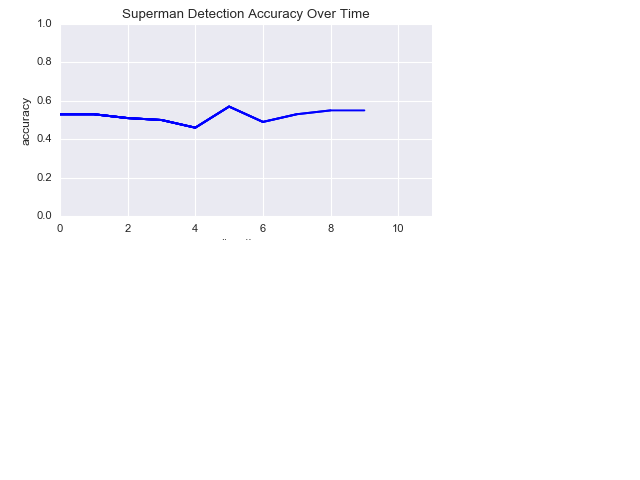

Accuracy: 0.53, false positives: 0.0, false negatives: 0.47, true positives: 0.0, true negatives: 0.53
Mean latency: 65.75051 ms
Accuracy: 0.53, false positives: 0.0, false negatives: 0.47, true positives: 0.0, true negatives: 0.53
Mean latency: 58.8876 ms
Accuracy: 0.51, false positives: 0.0, false negatives: 0.49, true positives: 0.0, true negatives: 0.51
Mean latency: 59.10641 ms
Accuracy: 0.5, false positives: 0.0, false negatives: 0.5, true positives: 0.0, true negatives: 0.5
Mean latency: 58.55846 ms
Accuracy: 0.46, false positives: 0.0, false negatives: 0.54, true positives: 0.0, true negatives: 0.46
Mean latency: 63.40987 ms
Accuracy: 0.57, false positives: 0.0, false negatives: 0.43, true positives: 0.0, true negatives: 0.57
Mean latency: 58.39408 ms
Accuracy: 0.49, false positives: 0.0, false negatives: 0.51, true positives: 0.0, true negatives: 0.49
Mean latency: 58.74221 ms
Accuracy: 0.53, false positives: 0.0, false negatives: 0.47, true positives: 0.0, true negatives: 0.5

In [ ]:
cifar_utils.run_serving_workload(ec2_host,
                                 app_name,
                                 test_x, test_y)